<a href="https://colab.research.google.com/github/dibacayaa/DataMining/blob/main/Nashville_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
path = kagglehub.dataset_download("justinwilcher/nashville-accident-reports-jan-2018-apl-2025")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/nashville-accident-reports-jan-2018-apl-2025


In [4]:
# Menampilkan isi folder dataset untuk memastikan nama file yang benar
dataset_folder = '/kaggle/input/nashville-accident-reports-jan-2018-apl-2025'
for filename in os.listdir(dataset_folder):
    print(filename)


Nashville Accidents Jan 2018 - Apl 2025.csv


In [7]:
file_path = os.path.join(dataset_folder,'Nashville Accidents Jan 2018 - Apl 2025.csv')

In [8]:
# Membaca file CSV yang ditemukan
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dataset
print(df.head())


   Accident Number          Date and Time  Number of Motor Vehicles  \
0       2008473471  7/14/2018 11:00:00 PM                       2.0   
1       2008787228  11/16/2018 9:33:00 AM                       1.0   
2       2009131786  2/19/2019 10:42:00 PM                       1.0   
3       2009418107   5/27/2019 9:00:00 PM                       2.0   
4      20120135824    3/8/2021 6:05:00 PM                       2.0   

   Number of Injuries  Number of Fatalities Property Damage Hit and Run  \
0                 2.0                   0.0             NaN           N   
1                 1.0                   0.0             NaN           N   
2                 1.0                   0.0             NaN           N   
3                 0.0                   0.0             NaN           Y   
4                 1.0                   0.0             NaN           N   

                Collision Type Description    Weather Description  \
0                                    ANGLE  NO ADVERS

In [9]:
# Menampilkan nama-nama kolom dalam dataset
print(df.columns)

Index(['Accident Number', 'Date and Time', 'Number of Motor Vehicles',
       'Number of Injuries', 'Number of Fatalities', 'Property Damage',
       'Hit and Run', 'Collision Type Description', 'Weather Description',
       'Illumination Description', 'Street Address', 'City', 'State',
       'Precinct', 'Lat', 'Long', 'HarmfulCodes', 'HarmfulDescriptions',
       'ObjectId', 'Zip Code', 'RPA', 'Weather', 'IlluACCIDEmination',
       'Collision Type', 'Reporting Officer', 'x', 'y'],
      dtype='object')


In [10]:
df = df.dropna(subset=['Number of Motor Vehicles', 'Zip Code', 'Number of Injuries','Accident Number','Hit and Run'])

In [11]:
x = df[['Number of Motor Vehicles','Zip Code','Number of Injuries','Accident Number']]
y = df['Hit and Run']

In [13]:
print(x)

        Number of Motor Vehicles  Zip Code  Number of Injuries  \
0                            2.0   37208.0                 2.0   
1                            1.0   37203.0                 1.0   
2                            1.0   37218.0                 1.0   
4                            2.0   37207.0                 1.0   
5                            2.0   37210.0                 0.0   
...                          ...       ...                 ...   
216112                       2.0   37115.0                 0.0   
216113                       3.0   37211.0                 2.0   
216114                       1.0   37211.0                 0.0   
216115                       2.0   37203.0                 2.0   
216116                       2.0   37013.0                 0.0   

        Accident Number  
0            2008473471  
1            2008787228  
2            2009131786  
4           20120135824  
5           20130207124  
...                 ...  
216112      20250214872  

In [14]:
y

,Hit and Run
0,N
1,N
2,N
4,N
5,N
...,...
216112,Y
216113,N
216114,N
216115,N


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [16]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [17]:
accuracy = dtree.score(x_test, y_test)
print(f"Akurasi model: {accuracy*100:.2f}%")

Akurasi model: 74.07%


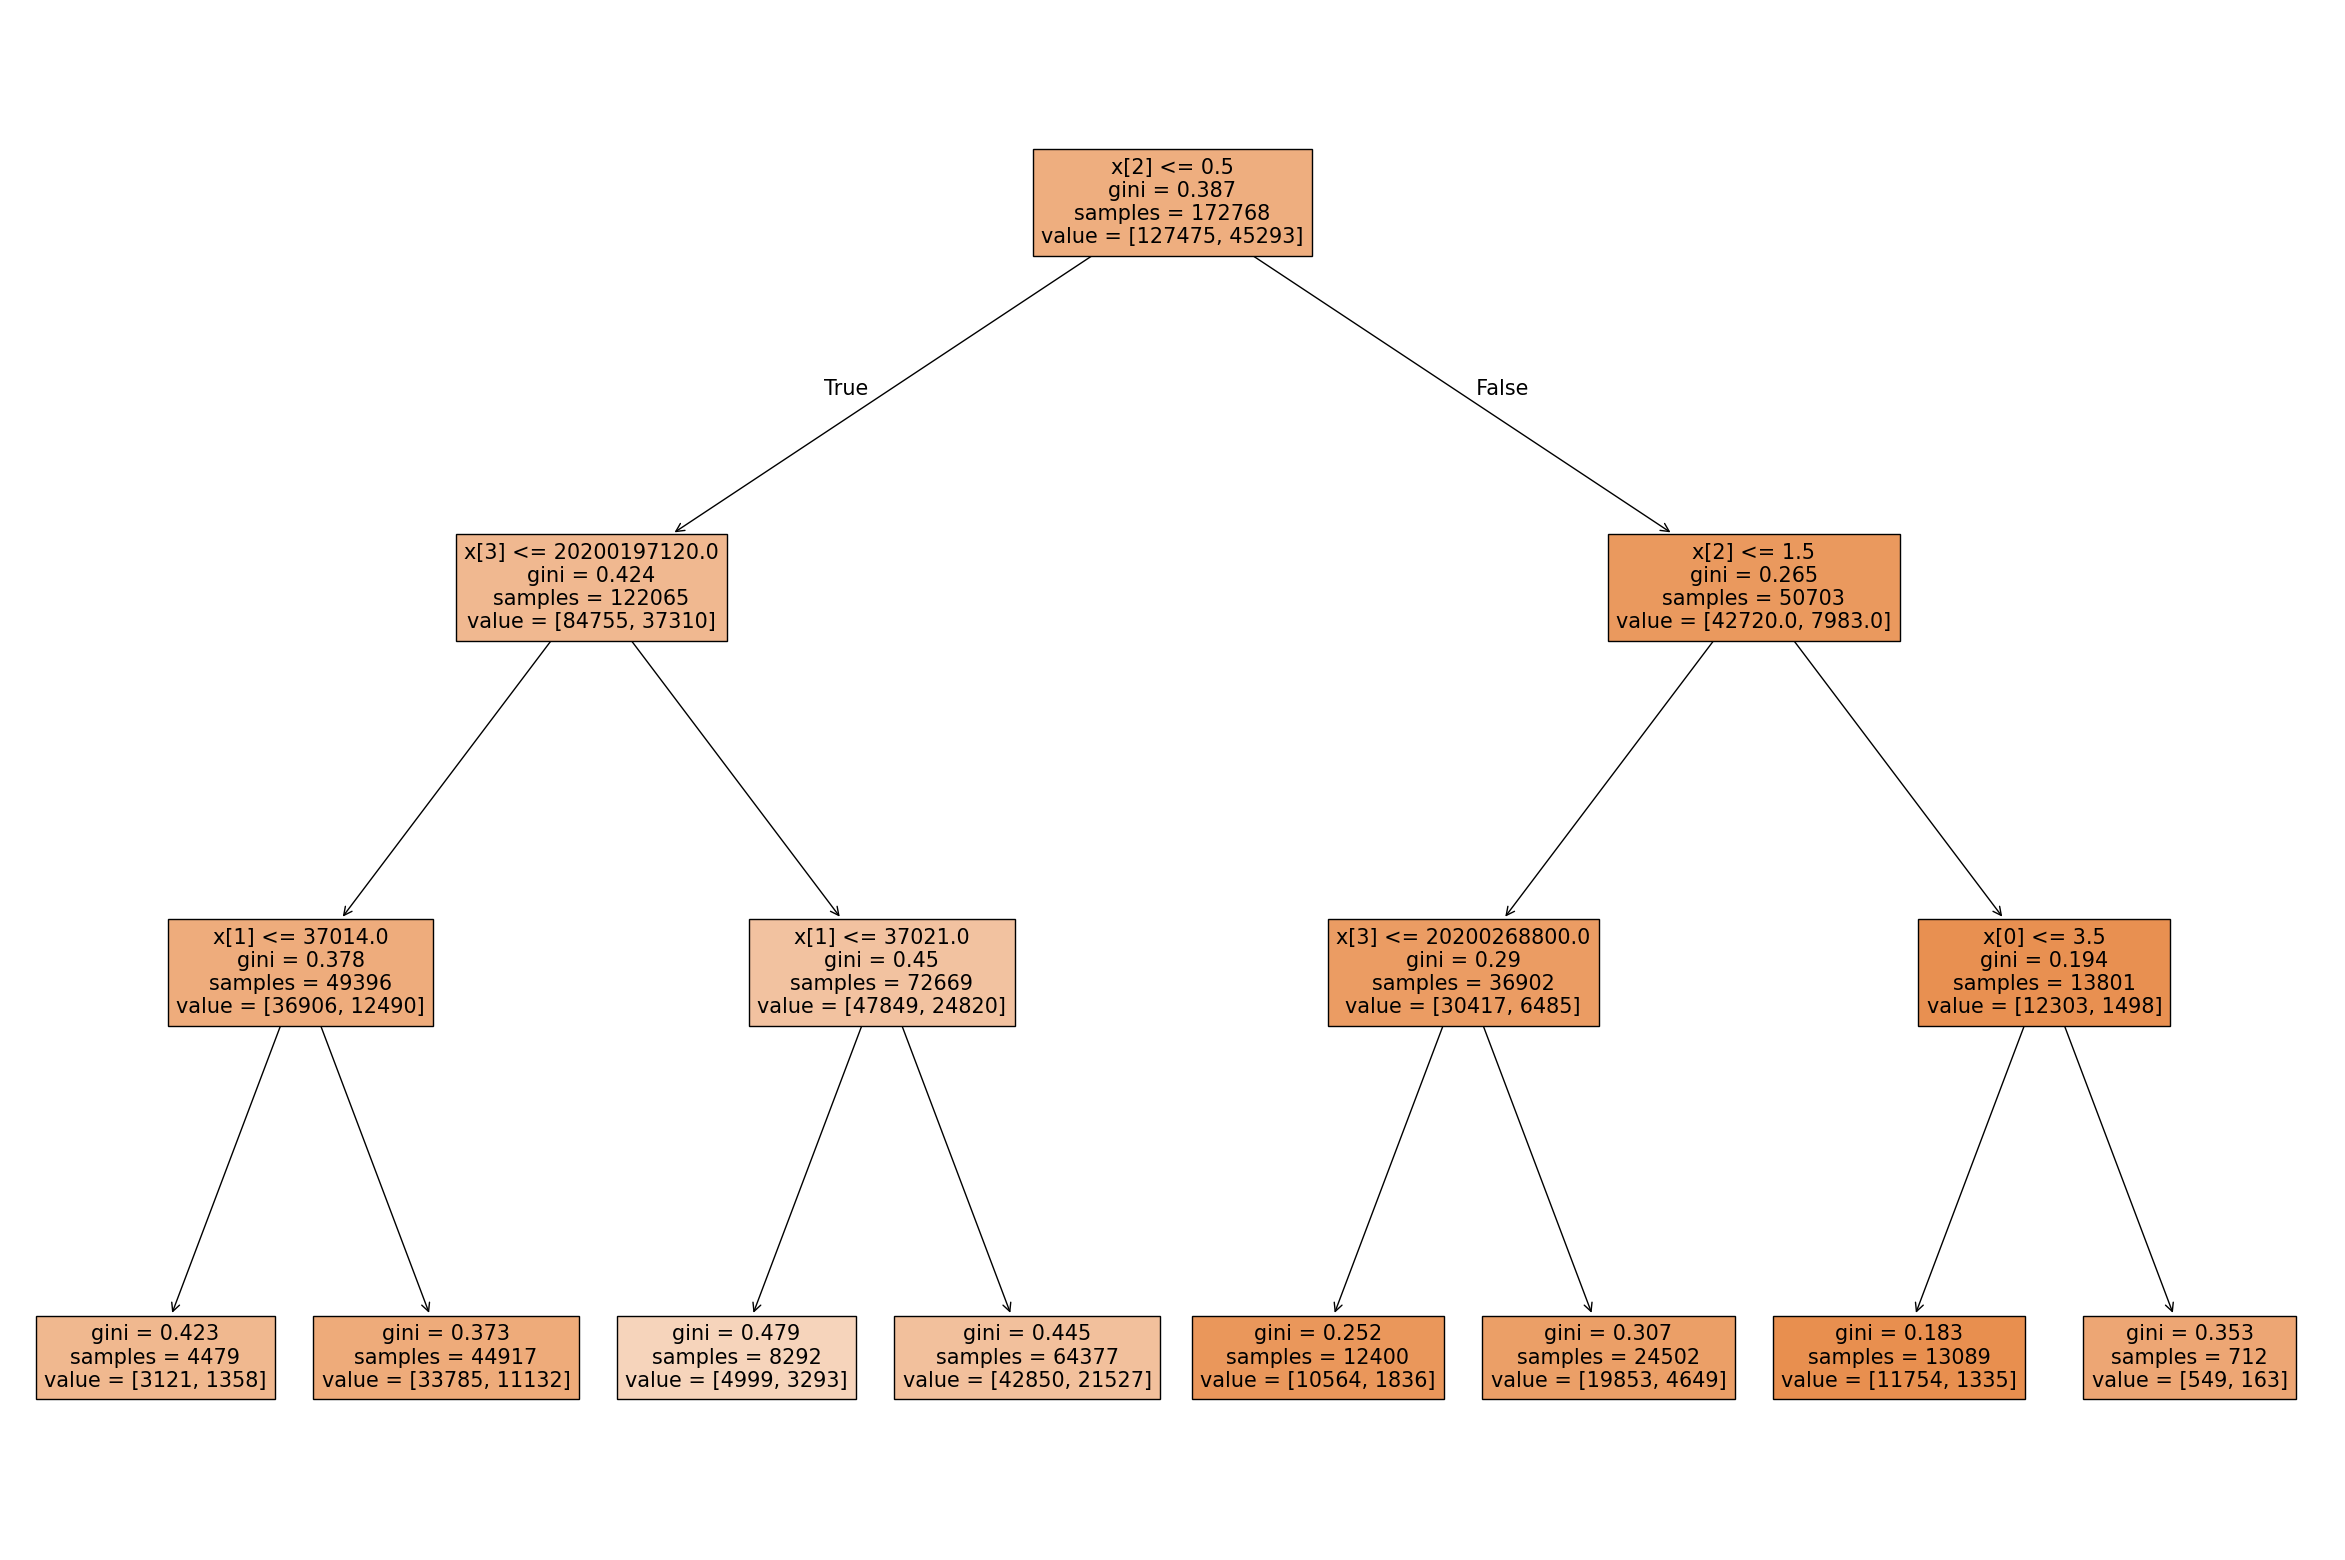

In [18]:
plt.figure(figsize=(30, 20))
plot_tree(dtree, filled=True)
plt.show()